In [31]:
# I.
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

import geopandas as gpd
from area import area
import numpy as np

import seaborn as sns


In [2]:
#Conclusión:  
# Las estadísticas del area del geopandas incluyen el mar; 
# es necesario sólo las estadísticas de la tierra sin incluír el area marítima
# Para esto, usaremos las estadíticas de land de la UN data: https://data.un.org/

In [32]:
# II 

landun = pd.read_csv('/home/hmdg/Documents/Data_Science/Lands/SYB62_145_201904_Land.csv', 
                      header=1, encoding='iso8859_1')#'utf-8-sig')

# Añado columna con la fuente de toda la info
landun['general_source'] = 'https://data.un.org/' #-Environment, Land - last version 2019
# or https://www.un.org/en/databases/ Statistical Data UN Data

# Cambio nombre de columnas
list = {'Unnamed: 1' : 'region_country',
         'Region/Country/Area': 'number',
         'Series' : 'type',
         'Value' : 'value',
         'Year' : 'year',
         'Footnotes' : 'footnotes',
         'Source' : 'source',
        }

landun = landun.rename(columns = list)

print('- The df has ',str(len(landun.columns)), ' columns :\n')
col = [print('*',landun.columns[n]) for n in range(len(landun.columns))]

print('\n- A size of ',str(landun.shape[0]), ' rows',
      '\n- A',landun.isnull().sum()[landun.isnull().sum()>0].item(),' null values; just in the "footnotes column',
      '\n- More specific details: \n')

landun.info()


- The df has  8  columns :

* number
* region_country
* year
* type
* value
* footnotes
* source
* general_source

- A size of  6199  rows 
- A 3411  null values; just in the "footnotes column 
- More specific details: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6199 entries, 0 to 6198
Data columns (total 8 columns):
number            6199 non-null int64
region_country    6199 non-null object
year              6199 non-null int64
type              6199 non-null object
value             6199 non-null float64
footnotes         2788 non-null object
source            6199 non-null object
general_source    6199 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 387.5+ KB


# How many types of lands are classified?

In [34]:
[print(n, landun.type.unique()[n])  for n in range(len(landun.type.unique()))]

0 Land area (thousand hectares)
1 Arable land (thousand hectares)
2 Permanent crops (thousand hectares)
3 Forest cover (thousand hectares)
4 Arable land (% of total land area)
5 Permanent crops (% of total land area)
6 Forest cover (% of total land area)
7 Important sites for terrestrial biodiversity protected (% of total sites protected)


[None, None, None, None, None, None, None, None]

* There are 8 different groups, that can be classified in 5 types of land:
    - The 5 lands types:  
        - Land area ("thousand hectares")
        - Arable land ("thousand hectares" and "% of total land area")
        - Forest cover ("thousand hectares" and "% of total land area")
        - Permanent crops ("thousand hectares" and "% of total land area")
        - Important sites for terrestrial biodiversity protected ("% of total sites                                     protected")


# How many countries do we have?

In [35]:
print('\nThere are ' +str(landun.region_country.unique().shape[0])+ ' different names of regions/countries.\n')
lcountry = print(landun.region_country.unique())
lcountry



There are 276 different names of regions/countries.

['Total, all countries or areas' 'Africa' 'Northern Africa'
 'Sub-Saharan Africa' 'Eastern Africa' 'Middle Africa' 'Southern Africa'
 'Western Africa' 'Americas' 'Northern America'
 'Latin America & the Caribbean' 'Caribbean' 'Central America'
 'South America' 'Asia' 'Central Asia' 'Eastern Asia' 'South-eastern Asia'
 'Southern Asia' 'Western Asia' 'Europe' 'Eastern Europe'
 'Northern Europe' 'Southern Europe' 'Western Europe' 'Oceania'
 'Australia and New Zealand' 'Melanesia' 'Micronesia' 'Polynesia'
 'Antarctica' 'Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra'
 'Angola' 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurin. State of)' 'Bonaire, St. Eustatius & Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Indian Ocean Terr.'
 'British Virgin 

If we see carefull the data, the firsts registers are region names (from 'Africa' to 'Polynesia'). We will filter just the countries names later.

## How much data do we have for every country by year?

In [36]:
# Functions to style the differences in the tables

def highlight_max(s): # highlight the maximum in a Series yellow.
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
    
def highlight_red(s): # highlight the maximum in a Series red.
    is_max = s == s.max()
    return ['color: red' if v else '' for v in is_max]


lg = landun.groupby(['year','type']).count()
lg[['region_country', 'value']]

###################################################################
# Let's focus in the nearest year with more complete data = 2016 ##
###################################################################

l16 = landun[landun.year==2016]
lg = l16.groupby(['year','type']).count()
lg = lg[['region_country']].sort_values(by='region_country')
lg['dif'] = lg.region_country.max() - lg.region_country
lg['dif_%'] = 100*(lg.dif/lg.region_country.max())

lg.style.apply(highlight_max, subset=['region_country']).apply(highlight_red, subset=['dif', 'dif_%'])


Notes:

- The remarkables aspects of the table above are:
   - The max value is 259. This means that the 'Land area' is the land type with more data statized; if we consider that there are 279 country names, there are lost 20 register this column for this specific type; and more for the rest of the types.
   - The less percentage of data correspond to 'Important sites for terrestrial biodiversity protected (% of total sites protected)' type.
   - There are no NULLs values, are just less values/registers/rows per country. See the complement in plot below. The column that has null values is footnotes; and there is data not needed for this example.
   - These missing records will be watched later.

Because there are names in the 'region_country' column that are regions (like 'Middle Africa'), we will wait until match this data with the geopandas one, in order to filter just the countries and analyse better this values.



In [37]:
# III
# Inspección de la data
## Dividimos la data por regiones

# By inspection, we realized that the data of the countries are after the 29 row.
c = landun[['number','region_country','type', 'value']][~landun['region_country'].str.contains(' all countries or areas')]
[print(n,c.region_country.unique()[n]) for n in range(len(c.region_country.unique()))]

c_uni = c[30:] # lista de países... y no regiones

# By inspection of the data, 
ldown = landun[landun['region_country'].isin(c_uni)]
#ldown = landun.loc[685:] # Acá solo hay data según la división por regiones del mundo
lup = landun.loc[:684] # Acá está la mayoría de la data según la división por países del mundo

llup = lup['region_country'].unique()
lldown = ldown['region_country'].unique()

print('land type: ', ldown['type'].unique())
print('__________________________________________________________________________________________')
ltype = ldown['type'].unique()[:3] 
lyear = ldown['year'].unique()

print('total de países/regiones en ldown: ', lldown.shape[0],'\n')
for t in range(3):
    for y in range(3):
        print('Año', lyear[y],' - ',ltype[t], 
              ldown['value'][(ldown['type']==ltype[t]) & (ldown['year']==lyear[y])].shape)

print('__________________________________________________________________________________________')
print('esto dice que hay: \n16 países que no tienen data de Land Area,\n 9 más sin data de Arable Lands,\n y 22 de Permanent Crops.\n Y el año 2018 no tiene data')


0 Africa
1 Northern Africa
2 Sub-Saharan Africa
3 Eastern Africa
4 Middle Africa
5 Southern Africa
6 Western Africa
7 Americas
8 Northern America
9 Latin America & the Caribbean
10 Caribbean
11 Central America
12 South America
13 Asia
14 Central Asia
15 Eastern Asia
16 South-eastern Asia
17 Southern Asia
18 Western Asia
19 Europe
20 Eastern Europe
21 Northern Europe
22 Southern Europe
23 Western Europe
24 Oceania
25 Australia and New Zealand
26 Melanesia
27 Micronesia
28 Polynesia
29 Antarctica
30 Afghanistan
31 Albania
32 Algeria
33 American Samoa
34 Andorra
35 Angola
36 Anguilla
37 Antigua and Barbuda
38 Argentina
39 Armenia
40 Aruba
41 Australia
42 Austria
43 Azerbaijan
44 Bahamas
45 Bahrain
46 Bangladesh
47 Barbados
48 Belarus
49 Belgium
50 Belize
51 Benin
52 Bermuda
53 Bhutan
54 Bolivia (Plurin. State of)
55 Bonaire, St. Eustatius & Saba
56 Bosnia and Herzegovina
57 Botswana
58 Brazil
59 British Indian Ocean Terr.
60 British Virgin Islands
61 Brunei Darussalam
62 Bulgaria
63 Burki

IndexError: index 0 is out of bounds for axis 0 with size 0

In [247]:
# IV

# Inspección de la dataI -

# ldown.columns # ['region', 'country', 'year', 'type', 'value', 'footnotes', 'source', 'general_source'],
# Tomemos el ejemplo del añ0 2016
ldown16=ldown[['type','region_country']][ldown['year']==2016]

#Data faltante en general de ldown

print('___cuales países tienen datos faltantes (2016) ___\n')

print('cantidad de países/regiones:', len(ldown['region_country'].unique()),'\n')
cc = ldown16.groupby(['type']).count()

print('___data que falta por tipo___\n')
print(cc['region_country'].sort_values(ascending=False),'\n')

print('___hay 245 paises y hay data de 229 lands ... y sigue decreciendo para el resto ___\n')

print('___cuales son esos países?___\n')

ltype = ldown['type'].unique()
print('esta es la cantidad de data x país x año: ', ltype.shape[0],'\n')

ctype =ldown16.groupby(['region_country']).count()
ctype = ctype[(ctype['type']!=8)].sort_values(by='type', ascending=False)
print('esta es la lista de países que le faltan data (type<8): ', ltype.shape[0],'\n')
lp = ctype.index
print('__ Veamos cual de estos países/regiones son países coincidentes con la data de countries_ref')



___cuales países tienen datos faltantes (2016) ___

cantidad de países/regiones: 0 

___data que falta por tipo___

Series([], Name: region_country, dtype: int64) 

___hay 245 paises y hay data de 229 lands ... y sigue decreciendo para el resto ___

___cuales son esos países?___

esta es la cantidad de data x país x año:  0 

esta es la lista de países que le faltan data (type<8):  0 

__ Veamos cual de estos países/regiones son países coincidentes con la data de countries_ref


Index(['number', 'region_country', 'year', 'type', 'value', 'footnotes',
       'source', 'general_source'],
      dtype='object')
   number  region_country   year   type  value  footnotes  source  \
0   False           False  False  False  False       True   False   
1   False           False  False  False  False       True   False   
2   False           False  False  False  False       True   False   
3   False           False  False  False  False       True   False   
4   False           False  False  False  False       True   False   

   general_source  
0           False  
1           False  
2           False  
3           False  
4           False  


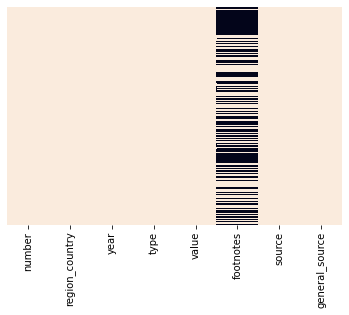

In [6]:
# V

#landun1 = landun.drop(columns='footnotes', axis=0)

landun1 = landun
print(landun1.columns)

landunsns = landun1.isnull()

print(landunsns.head())
sns.heatmap(~landunsns, cbar=False, yticklabels=False)

plt.show()

# Falta data de type en algunos año por country ... pero no hay datos nulos
# Necesito revisar la cantidad de data por país.... 

# Continue in here

## Let's see the geopandas library.

In [38]:
# VI 

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# print(world.columns)

# gpd_version = gpd.__version__
# print('version: ',gpd_version)

# print(world.shape, world.info())
# print('_______________________________________')
# print(landun.info())

world = world.copy()


print('- The df has ',str(len(world.columns)), ' columns :\n')
col = [print('*',world.columns[n]) for n in range(len(world.columns))]

print('\n- A size of ',str(world.shape[0]), ' rows',
      '\n- No NULL values',
      '\n- More specific details: \n')

world.info()


- The df has  6  columns :

* pop_est
* continent
* name
* iso_a3
* gdp_md_est
* geometry

- A size of  177  rows 
- No NULL values 
- More specific details: 

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
pop_est       177 non-null int64
continent     177 non-null object
name          177 non-null object
iso_a3        177 non-null object
gdp_md_est    177 non-null float64
geometry      177 non-null geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


# How many countries do we have?

In [39]:
print('\nThere are ' +str(world.name.unique().shape[0])+ ' different names of countries.\n')

wcountry = print(world.name.unique())
wcountry



There are 177 different names of countries.

['Fiji' 'Tanzania' 'W. Sahara' 'Canada' 'United States of America'
 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea' 'Indonesia' 'Argentina'
 'Chile' 'Dem. Rep. Congo' 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti'
 'Dominican Rep.' 'Russia' 'Bahamas' 'Falkland Is.' 'Norway' 'Greenland'
 'Fr. S. Antarctic Lands' 'Timor-Leste' 'South Africa' 'Lesotho' 'Mexico'
 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia' 'Panama' 'Costa Rica'
 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala' 'Belize' 'Venezuela'
 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico' 'Jamaica' 'Cuba'
 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali' 'Mauritania' 'Benin'
 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana' "Côte d'Ivoire" 'Guinea'
 'Guinea-Bissau' 'Liberia' 'Sierra Leone' 'Burkina Faso'
 'Central African Rep.' 'Congo' 'Gabon' 'Eq. Guinea' 'Zambia' 'Malawi'
 'Mozambique' 'eSwatini' 'Angola' 'Burundi' 'Israel' 'Lebanon'
 'Madagascar' 'Palestine' 'Gambia' 'Tunisia' 'Algeria' 'Jo

# Merge de dataframes

## In order to mix the country location data with the lands distribution, we will match the 'region_country' of the Lands df with the 'name' of the world df. 


In [40]:

world_lands = world.merge(landun, left_on ='name',
                          right_on ='region_country', how ='outer', 
                          left_index=True, indicator=True)

print(landun.shape, world.shape, world_lands.shape)
len(world_lands.name.unique()), len(world.name.unique()) - len(world_lands.name.unique())

world.columns

(6199, 8) (177, 6) (6229, 15)


Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

There are register not coincident in both tables. This means, there are country names that are not exactly the same in both data bases.
Let's find out this cases, keeping in mind that the reference is the geopandas df (world).
We'll focus in those ones missing in world.

In [41]:
# DataFrame with all the register, includind this ones that are not coincidents.

def diff_countries(ldf, cl): # df1 is world, df2 is landun
    df1=ldf[0]
    df2=ldf[1]
    n0 = cl[0]
    n1 = cl[1]
    d1 = pd.DataFrame(df1[n0].unique(), columns=[n0])
    d1['name_dif']=''
    d1['n_ind']=''
    d2 = df2[n1].unique()
    for nc in d2:
        pat = nc
        d1['name_dif'] = d1['name_dif'].mask(d1[n0].str.contains(pat, regex=False),pat)
    for l in range(d1.shape[0]):
        if d1.loc[l,n0] == d1.loc[l,'name_dif']:
            d1.loc[l,'n_ind'] = 'idem'
    d1 = d1[d1['n_ind']!= 'idem']
    d1 = d1[d1.name_dif!='']
    d1 = d1.drop('n_ind', axis=1)
        
    return (d1)

# Calling the function to know which country name in Landun is similar to World 
ldf1=[world, landun]
cl1 = ['name','region_country']
over_landun = diff_countries(ldf1,cl1)    

# Calling the function to know which country name in World is similar to Landun
ldf2=[landun, world]
cl2 = ['region_country', 'name']
over_world = diff_countries(ldf2,cl2)

over_landun.to_csv('/home/hmdg/Documents/Data_Science/Lands/over_landun.csv', index = False)
over_world.to_csv('/home/hmdg/Documents/Data_Science/Lands/over_world.csv', index = False)



This two files above shows the partial matchs between both tables.
Inspecting them manually, it'ts done a reference table.

In [42]:
# Merging the country names

country_ref = pd.read_csv('/home/hmdg/Documents/Data_Science/Lands/country_ref.csv', 
                          header=0, encoding='iso8859_1')

country_ref

# Particular cases:
landun.loc[1880:1904,'region_country'] = landun.loc[1880:1904,'region_country'].replace("Côte dIvoire","Côte d'Ivoire")


# Let's merge this country_ref table with the landun one:

In [43]:
world_lands[['name', 'region_country']].shape

country_ref
def add_countries(df1):
    df1['name_w']='' #df1 = landun
    for nc in range(country_ref.shape[0]):
        pat = country_ref.loc[nc,'region_country']
        df1['name_w']=df1['name_w'].mask(df1['region_country']==pat, country_ref.loc[nc,'name'])   
    df1['name_w'] = df1['name_w'].mask(df1['name_w']=='',df1['region_country'])
    return df1
    
landun_w = add_countries(landun)
landun_w.shape, landun.shape
#landun_w[['name_w','region_country']][landun_w['region_country'].str.contains('enezuela')]


((6199, 9), (6199, 9))

Now there is the Landun (lands df) with two country names columns: One with it originals('region_country') 
names and the other with the World df names (name_w).
Let's merge them in order to see how is it the match.

In [44]:
world_lands_after = world.merge(landun_w, left_on ='name',
                          right_on ='name_w', how ='inner', 
                          left_index=True, indicator=True)


world_lands_before = world.merge(landun, left_on ='name',
                          right_on ='region_country', how ='inner', 
                          left_index=True, indicator=True)

world_lands_before.shape, world_lands_after.shape

((3606, 16), (4181, 16))

After here, it's taken the world_lands_after df as the main reference.

In [121]:
# VII
######## Creción de la tabla de referencia/relación de países

ldown = landun.loc[685:] # Registros de Regiones del mundo
lup = landun.loc[:684] # Registros de Países

# creo DF con los nombres de landun
countries = ldown['region_country'].unique() # Global var
countries_dg = pd.DataFrame(countries, columns=['region_country'])
countries_dg['region_country'] = countries_dg['region_country'].str.lower()
lt = ['region_country', 'bool', 'name_w']
countries_dg = countries_dg.reindex(columns=lt)

# creo DF con los nombres de world
world_df = pd.DataFrame(world['name'].str.strip().str.lower())
lt = ['name', 'bool', 'name_w']
world_df = world_df.reindex(columns=lt)
world_df = world_df.rename(columns={'name':'name_l'})

# Busco los valores coincidentes en landun y world, coincidencias exactas
world_df['bool']=world_df['name_l'].isin(countries_dg['region_country'])
world_df['name_w'] = world_df['name_w'].mask(world_df['bool']==True, world_df['name_l'])
w_nc = world_df[world_df['bool']==False]
w_nc = w_nc.reset_index(drop=True)
w_nc = w_nc.copy()

# Busco los valores NO coincidentes (exactos) en landun y world
countries_dg['bool']=countries_dg['region_country'].isin(world_df['name_l'])
c_nc = countries_dg[countries_dg['bool']==False]
c_nc = c_nc.reset_index(drop=True)
c_nc = c_nc.rename(columns={'region_country':'name_l'})

# Contrasto los valores con coincidencias parciales entre ambas tablas
for nc in range(w_nc.shape[0]):
    pat = w_nc.loc[nc,'name_l']
    c_nc['name_w'] = c_nc['name_w'].mask(c_nc['name_l'].str.contains(pat, regex=False),pat)
       
# Añado las últimas coincidencias a al df original world_df, cuando el name_w NO esta vacio
world_con = pd.concat([world_df[world_df['name_w'].notna()],c_nc[c_nc['name_w'].notna()]], sort=True)

# Confirmo cuales son los países que faltan - No hay concidencia total o parcial
w_faltantes = world_df[~world_df['name_l'].isin(world_con['name_w'])]


# Añado los nombres de los países de doc. Excel (hecho a mano)
pays_faltantes = pd.read_csv('/home/hmdg/Documents/Data_Science/Maps/conversion_world_f.csv', encoding='iso8859_1')#'utf-8-sig')
countries_ref = pd.concat([world_con,pays_faltantes], sort=True)
countries_ref = countries_ref.reset_index(drop=True)
countries_ref = countries_ref.drop(columns=['bool'])
countries_ref

countries_ref.to_csv(r'/home/hmdg/Documents/Data_Science/Lands/countries_ref.csv', index = False)

,name_l,bool,name_w
0,american samoa,False,NaN
1,andorra,False,NaN
2,anguilla,False,NaN
3,antigua and barbuda,False,NaN
4,aruba,False,NaN
5,bahrain,False,NaN
6,barbados,False,NaN
7,bermuda,False,NaN
8,bolivia (plurin. state of),False,NaN
9,"bonaire, st. eustatius & saba",False,NaN


In [9]:
# VII

# Inspección de la dataII - landun con world 

lp = pd.DataFrame(lp) # Viene de la parte I, países faltantes

lp['country'] = lp['country'].str.strip().str.lower()
countries_ref

# Estos son los países que tienen data faltante y que coinciden con los registos de world
pfalt=lp.merge(countries_ref, how='inner', left_on='country', right_on='name_l')

p_invest = pfalt['country']
p_invest = p_invest.copy() 

print('_____________________________________________________________________')

#### Tengo que ver por cada país, cuál es la cantidad de registros que faltan

# cuantos registros debe tener cada pais:
print('Estos son los registros por país (head)')

ldown_=ldown[['type','country', 'year']]
cc = ldown_.groupby(['country']).count()
print(cc.sort_values(by='type', ascending=False).head())

reg_año = ldown['type'].unique().shape[0]
cant_años = ldown['year'].unique().shape[0]

reg_pais = (reg_año*(cant_años-1)) + 1

print('\nPorque? porque cada país tiene 8 registros por 3 años, mas 1 registro del 2018.\n Esto hace un total de: ', str(reg_pais), 'registros por país.\n') # 


ldown['country'] = ldown['country'].str.strip().str.lower()
ldown = ldown.copy()
ldown = ldown.reset_index(drop=True)

# llenaremos la cantidad de registros faltantes con data NaN en esos países
print('\nLlenaremos la cantidad de registros faltantes con data NaN en esos países\n. Cuáles son estos países? (head)')
cf = cc[(cc['type']<25)].sort_values(by='type', ascending=False)

print('_______________________________________________________________________')
print(cf.head())
   
print('\nCuáles de estos estos países coinciden con la tabla de world?\n')

ldownf = ldown['country'].isin(p_invest)
ldownf = ldownf.copy()
ldownf2 = ldown[ldownf]
ldownf2 = ldownf2[['type','country', 'region']]

l2 = ldownf2.groupby(['country','region']).count()
l2 = l2.copy()

print('l2[type]: ', l2['type'])
# Ahora si vamos a llenar las filas que faltan con país, con NaN
print('\nAhora si vamos a llenar las filas que faltan con país, con NaN.')
print(l2['type'].sum())

lpa = [l2.index[p] for p in range(len(l2)) for s in range(25-l2['type'][p])]

lpb = pd.DataFrame(lpa, columns=['country', 'region'])

lpb = lpb.copy()

ldown_ap = pd.concat([ldown,lpb], sort=False)
ldown_ap= ldown_ap.copy()

#print('rows antes de añadir las nuevas: ', ldown.shape, ' y después: ', ldown_ap.shape)

# print('\nejemplo con guyana\n')
# print(ldown_ap[ldown_ap['country']=='guyana'])


_____________________________________________________________________
Estos son los registros por país (head)
             type  year
country                
Afghanistan    25    25
Nigeria        25    25
Mongolia       25    25
Morocco        25    25
Mozambique     25    25

Porque? porque cada país tiene 8 registros por 3 años, mas 1 registro del 2018.
 Esto hace un total de:  25 registros por país.


Llenaremos la cantidad de registros faltantes con data NaN en esos países
. Cuáles son estos países? (head)
_______________________________________________________________________
                          type  year
country                             
United States of America    21    21
Peru                        21    21
Jordan                      21    21
Guyana                      21    21
Andorra                     19    19

Cuáles de estos estos países coinciden con la tabla de world?

l2[type]:  country                      region
djibouti                     262       19

/home/hmdg/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [10]:
# VIII 

## SOLUCION DE MATRICES

ltype
lyear=ldown['year'].unique()
lyear=lyear[:3] # No tomo en cuenta el año 2018
print(lyear)
p_invest
matriz = []

# Creo el df con todos los valores de type, de los países a los que les falta data

for co in range(p_invest.shape[0]):
    for t in range(ltype.shape[0]):
        for y in range(lyear.shape[0]):
            conj = (ltype[t],lyear[y], p_invest[co])
            matriz.append(conj)
            
matriz = pd.DataFrame(matriz, columns=(['type','year','country']))

# # Creo el df con todos los valores de la región 
region = ldown.groupby(['region','country']).count()
rego = region['value'].reset_index(level=['region','country'])
rego = rego[['region','country']]

# Hago el merge de matriz con region
mat_reg = rego.merge(matriz, on='country',how='inner')

mat_reg = mat_reg[['type', 'year', 'country', 'region']]


# Hago el merge de mat_region con ldown

ldown_m = ldown[['region','country','type', 'year']]
ldown_n = ldown_m.merge(mat_reg, on=['country', 'year','type', 'region'], how='outer', indicator=True)

ldown_n['_merge'].unique() # [left_only, both, right_only]

ld = ldown_n[(ldown_n['_merge']=='right_only')]
ld = ld.reset_index(drop=True)
ld = ld[['region', 'country', 'type', 'year']]

ld

# hago FINALMENTE el concat de ld con la tabla de ldown
ldown_c = pd.concat([ldown, ld], sort=True)

ldown_c = ldown_c.reset_index(drop=True)


[2005 2010 2016]


In [11]:
# IX 

# Llenando los valores faltantes.

# I Land Area faltante 

lland = ldown_c[['country', 'value', 'year', 'type']][(ldown_c['type']=='Land area (thousand hectares)')
        & (ldown_c['value'].isnull())]


# Tenemos el forrest cover% de south sudan y sudan para el año 2016. Añadiremos el Land Area de 

# Sudan
# cada uno y calcularemos el Forrest Cover.
# 1,886,068 km²./ 188606.800 th Ha sudan  --- WIKI https://en.wikipedia.org/wiki/Geography_of_Sudan, 

#ldown_c.columns # ['country', 'footnotes', 'general_source', 'region', 'source', 'type', 'value', 'year']

lsudan = pd.DataFrame({'value':188606.800, 'general_source':'https://en.wikipedia.org/wiki/Geography_of_Sudan'},index=[5581])
ldown_c.update(lsudan)

ldown_c.loc[5581]

# South Sudan

# 619,745 km2 / 61974.500 th Ha South Sudan  --- WIKI https://en.wikipedia.org/wiki/South_Sudan, a partir de 2011....
lssudan = pd.DataFrame({'value':61974.500 , 'general_source':'https://en.wikipedia.org/wiki/Geography_of_Sudan'},index=[5561])
ldown_c.update(lssudan)
ldown_c.loc[5561]

#############

# II Forrest Cover faltante 
lforrest = ldown_c[['country', 'value', 'year', 'type']][(ldown_c['type'].str.contains('Forest cover|Land area')) 
                                                        & (ldown_c['year']==2016)]

lf1 = lforrest['country'][lforrest['value'].isnull()].unique()
lf2 = lforrest[lforrest['country'].isin(lf1)].sort_values(by=['year','country'])

indices = [5578, 5596]
i=0
for n in lf1:
    landsu = lf2['value'][(lf2['country']==n) & (lf2['type']=='Land area (thousand hectares)')]  
    fcovsu = lf2['value'][(lf2['country']==n) & (lf2['type']=='Forest cover (thousand hectares)')] 
    fpers = 100*np.divide(fcovsu,landsu)
    lfsu = pd.DataFrame({'value':fpers.item(), 'footnotes':'Calculated Value'},index=[indices[i]])
    ldown_c.update(lfsu)
    i += 1

ldown_c[['country', 'footnotes', 'type', 'value']][(ldown_c['country'].str.contains('sudan')) & (ldown_c['year']==2016)]


,country,footnotes,type,value
4595,south sudan,Estimate.,Forest cover (thousand hectares),7157.000000
4596,south sudan,NaN,Important sites for terrestrial biodiversity p...,33.640000
4675,sudan,Estimate.,Arable land (thousand hectares),19823.000000
4676,sudan,Estimate.,Permanent crops (thousand hectares),168.000000
4677,sudan,Estimate.,Forest cover (thousand hectares),19036.000000
4678,sudan,NaN,Important sites for terrestrial biodiversity p...,25.000000
5561,south sudan,NaN,Land area (thousand hectares),61974.500000
5564,south sudan,NaN,Arable land (thousand hectares),NaN
5567,south sudan,NaN,Permanent crops (thousand hectares),NaN
5572,south sudan,NaN,Arable land (% of total land area),NaN


In [12]:
# X

# III Arable Lands Faltantes

c_falt = ldown_c['country'][(ldown_c['value'].isnull()) & (ldown_c['year']==2016)].unique()

larable = ldown_c[(ldown_c['type'].str.contains('Land area|Arable land')) & (ldown_c['year']==2016) & (ldown_c['country'].isin(c_falt))]

# Sudan is the onlyone that has the 'Arable land (tho. Ha)'... I'll fill this one first
# Sudan
adsu = larable['value'][(larable['country']=='sudan') & (larable['type']=='Arable land (thousand hectares)')]  
cvsu = larable['value'][(larable['country']=='sudan') & (larable['type']=='Land area (thousand hectares)')] 
ldown_c.update(pd.DataFrame({'value':100*np.divide(adsu, cvsu).item(), 'footnotes':'Calculated Value'},index=[5590]))

# Faltan los valores de Fakland Island, greenland and South Sudan. No tienen ninguno de los valores de Arable.

# Fakland Island
# https://www.cia.gov/library/publications/the-world-factbook/geos/print_fk.html
# agricultural land: 92.4% (2011 est.)
# arable land: 0% (2011 est.) / permanent crops: 0% (2011 est.) / permanent pasture: 92.4% (2011 est.)
# forest: 0% (2011 est.)
# other: 7.6% (2011 est.)

ldown_c.update(pd.DataFrame({'value':0, 'general_source':'https://www.cia.gov/library/publications/the-world-factbook/geos/print_fk.html'},index=[5516]))
ldown_c.update(pd.DataFrame({'value':0, 'general_source':'https://www.cia.gov/library/publications/the-world-factbook/geos/print_fk.html'},index=[5522]))

# Greenland
# https://tradingeconomics.com/greenland/arable-land-percent-of-land-area-wb-data.html
# Agricultural land refers to the share of land area that is arable, under permanent crops, and under permanent pastures.
# Arable land (hectares) 900 ha, 0.9 th Ha
# Arable land (hectares per person) 0.016
# Arable land (% of land area) 0.00219 %

ldown_c.update(pd.DataFrame({'value':0.9/2, 'general_source':'https://tradingeconomics.com/greenland/arable-land-percent-of-land-area-wb-data.html', 'footnotes': 'Agricultural land refers to the share of land area that is arable, under permanent crops, and under permanent pastures.'},index=[5534]))
ldown_c.update(pd.DataFrame({'value':0.00219/2, 'general_source':'https://tradingeconomics.com/greenland/arable-land-percent-of-land-area-wb-data.html'},index=[5540]))

# South Sudan
# https://tradingeconomics.com/south-sudan/agricultural-land-sq-km-wb-data.html
# Agricultural land refers to the share of land area that is arable, under permanent crops, 
# and under permanent pastures.
# Agricultural land (sq. km) 285332 sq. Km - 28533200Ha, 28533.2 th Ha

ldown_c.update(pd.DataFrame({'value':28533.2/2, 'general_source':'https://tradingeconomics.com/greenland/arable-land-percent-of-land-area-wb-data.html', 'footnotes':'Agricultural land refers to the share of land area that is arable, under permanent crops, and under permanent pastures.'},index=[5564]))
ldown_c.update(pd.DataFrame({'value':100*((28533.2/2)/61974.5), 'general_source':'https://tradingeconomics.com/greenland/arable-land-percent-of-land-area-wb-data.html'},index=[5572]))

larable[['country', 'general_source', 'type', 'value']]


,country,general_source,type,value
1410,djibouti,https://data.un.org/,Land area (thousand hectares),2318.0
1411,djibouti,https://data.un.org/,Arable land (thousand hectares),2.0
1413,djibouti,https://data.un.org/,Arable land (% of total land area),0.1
1650,falkland islands (malvinas),https://data.un.org/,Land area (thousand hectares),1217.0
1973,greenland,https://data.un.org/,Land area (thousand hectares),41045.0
2142,guyana,https://data.un.org/,Land area (thousand hectares),19685.0
2143,guyana,https://data.un.org/,Arable land (thousand hectares),420.0
2146,guyana,https://data.un.org/,Arable land (% of total land area),2.1
2239,iceland,https://data.un.org/,Land area (thousand hectares),10025.0
2240,iceland,https://data.un.org/,Arable land (thousand hectares),121.0


In [13]:
# XI

# III Permanente Crops Faltantes


l_crops = ldown_c[(ldown_c['type'].str.contains('crops|Land area')) & (ldown_c['year']==2016) & (ldown_c['country'].isin(c_falt))]

# [ 'western sahara' 'south sudan']
# 'falkland islands (malvinas)', 'sudan', 'greenland', 'djibouti', 'iceland'    --- LISTO

# Sudan. 
# We have the permanents crops and land area, we make the calculus
addsu = l_crops['value'][(l_crops['country']=='sudan') & (l_crops['type']=='Permanent crops (thousand hectares)')]  
cvvsu = l_crops['value'][(l_crops['country']=='sudan') & (l_crops['type']=='Land area (thousand hectares)')] 
ldown_c.update(pd.DataFrame({'value':100*np.divide(addsu, cvvsu).item(), 'footnotes':'Calculated Value'},index=[5593]))

# Fakland Island
# https://www.cia.gov/library/publications/the-world-factbook/geos/print_fk.html
# agricultural land: 92.4% (2011 est.)
# arable land: 0% (2011 est.) / permanent crops: 0% (2011 est.) / permanent pasture: 92.4% (2011 est.)
# forest: 0% (2011 est.)
# other: 7.6% (2011 est.)
ldown_c.update(pd.DataFrame({'value':0, 'general_source':'https://www.cia.gov/library/publications/the-world-factbook/geos/print_fk.html'},index=[5519]))
ldown_c.update(pd.DataFrame({'value':0, 'general_source':'https://www.cia.gov/library/publications/the-world-factbook/geos/print_fk.html'},index=[5525]))

# Greenland
# https://tradingeconomics.com/greenland/arable-land-percent-of-land-area-wb-data.html
# Agricultural land refers to the share of land area that is arable, under permanent crops, and under permanent pastures.
# Arable land (hectares) 900 ha
# Arable land (hectares per person) 0.016
# Arable land (% of land area) 0.00219 %

ldown_c.update(pd.DataFrame({'value':0.9/2, 'general_source':'https://tradingeconomics.com/greenland/arable-land-percent-of-land-area-wb-data.html', 'footnotes': 'Agricultural land refers to the share of land area that is arable, under permanent crops, and under permanent pastures.'},index=[5537]))
ldown_c.update(pd.DataFrame({'value':0.00219/2, 'general_source':'https://tradingeconomics.com/greenland/arable-land-percent-of-land-area-wb-data.html'},index=[5543]))

# Djibouti
# https://tradingeconomics.com/djibouti/agricultural-land-percent-of-land-area-wb-data.html
# Agricultural land refers to the share of land area that is arable, under permanent crops, and under permanent pastures.
# Arable land (hectares) 2000 ha

ldown_c.update(pd.DataFrame({'value':2/2, 'general_source':'https://tradingeconomics.com/greenland/arable-land-percent-of-land-area-wb-data.html', 'footnotes': 'Agricultural land refers to the share of land area that is arable, under permanent crops, and under permanent pastures.'},index=[5528]))
ldown_c.update(pd.DataFrame({'value':100*(2/2318), 'footnotes':'Calculated Value'},index=[5531]))

# Iceland
# https://tradingeconomics.com/iceland/agricultural-land-percent-of-land-area-wb-data.html
# Agricultural land refers to the share of land area that is arable, under permanent crops, and under permanent pastures.
# Arable land (hectares) 121000 ha 121 th Ha

ldown_c.update(pd.DataFrame({'value':121/2, 'general_source':'https://tradingeconomics.com/iceland/agricultural-land-percent-of-land-area-wb-data.html', 'footnotes': 'Agricultural land refers to the share of land area that is arable, under permanent crops, and under permanent pastures.'},index=[5549]))
ldown_c.update(pd.DataFrame({'value':100*((121/2)/10025),'footnotes':'Calculated Value' },index=[5552]))

# Souht Sudan -
# No clear statistics
ldown_c.update(pd.DataFrame({'value':0, 'footnotes':'No clear statistics founded'},index=[5567]))
ldown_c.update(pd.DataFrame({'value':0,'footnotes':'No clear statistics founded'},index=[5575]))

# Western Sahara
# https://personal.ems.psu.edu/~williams/states/wi.htm
# arable land: 0%
# permanent crops: 0%

ldown_c.update(pd.DataFrame({'value':0, 'general_source':'https://personal.ems.psu.edu/~williams/states/wi.htm'},index=[5599]))
ldown_c.update(pd.DataFrame({'value':0,'general_source':'https://personal.ems.psu.edu/~williams/states/wi.htm' },index=[5602]))

    
l_crops[['country', 'general_source', 'type', 'value']]

,country,general_source,type,value
1410,djibouti,https://data.un.org/,Land area (thousand hectares),2318.0
1650,falkland islands (malvinas),https://data.un.org/,Land area (thousand hectares),1217.0
1973,greenland,https://data.un.org/,Land area (thousand hectares),41045.0
2142,guyana,https://data.un.org/,Land area (thousand hectares),19685.0
2144,guyana,https://data.un.org/,Permanent crops (thousand hectares),50.0
2147,guyana,https://data.un.org/,Permanent crops (% of total land area),0.3
2239,iceland,https://data.un.org/,Land area (thousand hectares),10025.0
2500,jordan,https://data.un.org/,Land area (thousand hectares),8878.0
2502,jordan,https://data.un.org/,Permanent crops (thousand hectares),87.0
2505,jordan,https://data.un.org/,Permanent crops (% of total land area),1.0


In [15]:
# XII 

# Comprobación I: los valores absolutos de las tierras sean menores al land

ldown_cp = ldown_c[ldown_c['year']==2016]

ldown_cp = ldown_cp[['country', 'type', 'value']]

ldown_cp = ldown_cp[~ldown_cp['type'].str.contains('%')]

ldtable = pd.pivot_table(ldown_cp, values='value', index='country', columns='type') 

ldtable = ldtable[['Land area (thousand hectares)', 'Arable land (thousand hectares)', 'Forest cover (thousand hectares)', 'Permanent crops (thousand hectares)' ]]

ldtable['sum'] = ldtable[['Arable land (thousand hectares)','Forest cover (thousand hectares)','Permanent crops (thousand hectares)']].sum(axis=1)


ldtable['ver'] = ldtable['Land area (thousand hectares)']-ldtable['sum']

ldtable['ver_per'] = 100*ldtable['ver']/ldtable['Land area (thousand hectares)'] 
# Porcentaje de la diferencia de tierras que son Arable, Forest and Crops con el Land


ldtable['info']=''
ldtable['info'] = ldtable['info'].mask(ldtable['ver']>=0, 1) 
ldtable['info'] = ldtable['info'].mask(ldtable['ver']<0, 0)
ldtable.sort_values(by='info')


# ---> Si ldtable['info'] = 1, quiere decir que el Land Total es mayor que la suma del resto de los 
# tipos de tierra (Arable, Fores Cover and Permanent Crops); sería Ok. La mayoría son OK.
# No se incluye los 'Important sites for terrestrial biodiversity protected (% of total sites protected)'


# Comprobación II: los valores porcentuales de las tierras sean menores al 100%

ldown_cnp = ldown_c[ldown_c['year']==2016]
ldown_cnp = ldown_cnp[ldown_cnp['type'].str.contains('%')]

ldown_cnp = ldown_cnp[~ldown_cnp['type'].str.contains('Important')]
# quito los 'Important sites for terrestrial biodiversity protected (% of total sites protected)'

# Es posible que los valores de 'Forest cover (% of total land area)' e 'Important sites for 
# terrestrial biodiversity protected (% of total sites protected)' sean conjuntos que se unen, 
# que tienen valores en común.

ldntable = pd.pivot_table(ldown_cnp, values='value', index='country', columns='type') 

ldntable['sum%'] = ldntable.sum(axis=1)

ldntable['info'] = ''
ldntable['info'] = ldntable['info'].mask(ldntable['sum%']>100,1) # Problema
ldntable['info'] = ldntable['info'].mask(ldntable['sum%']<=100,0)


ldntable.sort_values(by='info', ascending=False)
ldntable[ldntable['info']==1].count(), ldntable[ldntable['info']==0].count()
ldntable[ldntable['info']==1].sort_values(ascending=False, by='sum%')

# Quitan los valores de Important Sites; sólo hay 4 regiones cuyos porcentajes son mayores al 100%
# La data is OK!!


type,Arable land (% of total land area),Forest cover (% of total land area),Permanent crops (% of total land area),sum%,info
country,,,,,
micronesia (fed. states of),2.9,91.9,24.3,119.1,1
marshall islands,11.1,70.2,36.1,117.4,1
american samoa,15.0,87.5,9.5,112.0,1
sao tome and principe,9.1,55.8,40.6,105.5,1


In [17]:
# Cambio el orden de las columnas y descargo la data en un .csv

ldown_c = ldown_c[[ 'region', 'country', 'year', 'type', 'value', 'footnotes', 'source', 'general_source']]

ldown_c.head()

ldown_c.to_csv(r'/home/hmdg/Documents/Data_Science/Lands/ldown_c.csv', index = False)

# Hay que:
# Mejorar/automatizar los querys.
# Dividir el código en: I) Inspección de la data, II) cruce de tablas world y landun, III) modificación del cruce para 
# completar la de landun y crear finalmente la de ldown_c
# Revisar si los valores de la mayoría de los casos faltantes vienen de la misma fuente, tratar de automatizar
# o comparar con los existentes....

In [ ]:
df2 = pd.DataFrame(np.array([[1, 2, 'd'], [4, 5, 'e'], [7, 8, 'f']]),
                   columns=['a', 'b', 'c'])
df2

df3 = pd.DataFrame(np.array([[1, 10, 'a'], [4, 12, 'b'], [6, 14, 'c']]),
                   columns=['a', 'b', 'c'])

print('df2\n', df2,'\ndf3\n',df3)

dfn = df2.merge(df3,on='a', how='inner', indicator=True) #'outer', 'right', 'left'
dfn

# Descripcion of Lands Values:
Lands:
Total area excluding area under inland water bodies. The definition of inland water bodies generally includes major
rivers and lakes. Data are expressed in 1000 hectares (Ha).
    
Arable land:
Arable land includes land defined by the FAO as land under temporary crops 
(double-cropped areas are counted once), temporary meadows for mowing or for pasture, 
land under market or kitchen gardens, and land temporarily fallow. Land abandoned as 
a result of shifting cultivation is excluded.

Permanent Crops:
Crops are divided into temporary and permanent crops. Permanent crops are sown or planted once, and then occupy the land for some years and need not be replanted after each annual harvest, such as cocoa, coffee and rubber. This category includes flowering shrubs, fruit trees, nut trees and vines, but excludes trees grown for wood or timber.

Forest:
Area covered with forest, expressed as a percentage of the total land area. 
http://www.fao.org/ag/agn/nutrition/Indicatorsfiles/Agriculture.pdf


# Descripcion of Ecological Footprint (huella ecológica):
El cálculo de la huella ecológica es complejo, y en algunos casos imposible, lo que conforma su principal limitación como indicador; en cualquier caso, existen diversos métodos de estimación a partir del análisis de los recursos que una persona consume y de los residuos que produce. La cantidad de hectáreas utilizadas para urbanizar, generar infraestructuras y centros de trabajo.

- Hectáreas necesarias para proporcionar el alimento vegetal necesario.
- Superficie necesaria para pastos que alimenten al ganado.
- Superficie marina necesaria para producir peces.
- Hectáreas de bosque necesarias para asumir el CO2 que provoca nuestro consumo energético. En este sentido no solo incidiría el grado de eficiencia energética alcanzado sino también las fuentes empleadas para su obtención: a mayor uso de energías renovables, menor huella ecológica.

Desde un punto de vista global, se ha estimado en 1,8 ha2​ la biocapacidad del planeta por cada habitante, o lo que es lo mismo, si tuviéramos que repartir el terreno productivo de la tierra en partes iguales, a cada uno de los más de seis mil millones de habitantes en el planeta, les corresponderían 1,8 hectáreas para satisfacer todas sus necesidades durante un año. Con los datos de 2005, el consumo medio por habitante y año es de 2,7 hectáreas, por lo que, a nivel global, estamos consumiendo más recursos y generando más residuos de los que el planeta puede generar y admitir.

https://es.wikipedia.org/wiki/Huella_ecol%C3%B3gica